In [7]:
!git clone https://github.com/quinn-parker/polymer-ML-research.git
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection
import keras
from sklearn.manifold import MDS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib

print('Done')

fatal: destination path 'polymer-ML-research' already exists and is not an empty directory.
Done


In [8]:
##This data frame is concat from 100 row element files (127 files in total). Each monomer structure is created by 100 rows, each with three coordinates.

##Clunky, but he we read each different type of monomer into a pandas df.
bData = pd.read_csv('/content/polymer-ML-research/normal coordinates/b-config.csv', header=None)
giData = pd.read_csv('/content/polymer-ML-research/normal coordinates/gi-config.csv', header=None)

##Read in the "answers" for the monomer types. B = 0, C = 1, Ge = 2, Gi = 3 for our case
bAnswers = pd.read_csv('/content/polymer-ML-research/Answers/b-labels.csv', header = None)
giAnswers = pd.read_csv('/content/polymer-ML-research/Answers/gi-labels.csv', header=None)

##Now we shall concat, respectivly, the Data & Answers
totalData = pd.concat([bData, giData])
totalAnswers = pd.concat([bAnswers, giAnswers])

##Using SKlearn for splitting test and training into 33% testing and the rest for training.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(totalData, totalAnswers, test_size=0.33, random_state=1701)

In [9]:
  ## Here we initiate the keras sequential api and use dense layers.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
np.random.seed(1701)
model = Sequential()
model.add(Dense(units =100, activation = 'relu', input_shape = totalData.shape[1:]))
model.add(Dense(units = 100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)))
model.add(Dropout(0.20))
model.add(Dense(units = 5, activation = 'softmax', kernel_regularizer=keras.regularizers.l2(0.02)))
  #kernel_initializer='uniform'


In [10]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.99, beta_2=0.99, epsilon=1e-07, name="Nadam"), loss =keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,batch_size=30, validation_data=(X_test,y_test))

Epoch 1/100
13/13 [==============================] - 0s 20ms/step - loss: 30.3779 - accuracy: 0.4356 - val_loss: 26.5134 - val_accuracy: 0.5500
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 20.4011 - accuracy: 0.5260 - val_loss: 9.6088 - val_accuracy: 0.5389
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 13.7092 - accuracy: 0.5178 - val_loss: 16.8863 - val_accuracy: 0.5500
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 10.6855 - accuracy: 0.6219 - val_loss: 4.9771 - val_accuracy: 0.6111
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 11.1886 - accuracy: 0.5178 - val_loss: 4.5595 - val_accuracy: 0.6000
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 8.4764 - accuracy: 0.5178 - val_loss: 5.5623 - val_accuracy: 0.4889
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 7.8819 - accuracy: 0.5616 - val_loss: 4.5476 - val_accuracy: 0.6944
Epoch

In [6]:
#In case you need to clear the previous action, easily.
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Confusion matrix, without normalization
[[ 75   0]
 [  0 105]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


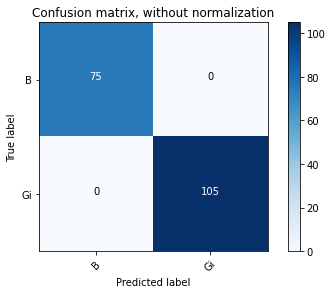

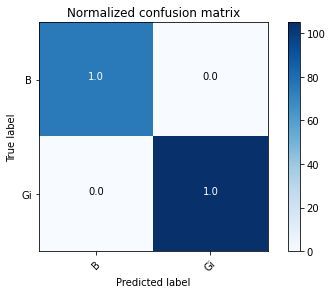

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


##Lets make a confusing Confusion Matrix with SKLearn.
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
classes_pred = np.argmax(pred, axis = 1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, classes_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
nonNormalMatrix = plot_confusion_matrix(cnf_matrix, classes=['B','Gi'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
normalMatrix = plot_confusion_matrix(cnf_matrix, classes=['B','Gi'], normalize=True, title='Normalized confusion matrix')
normalMatrix

In [13]:
##We now print a classification report from confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           3       1.00      1.00      1.00       105

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



<Figure size 432x288 with 0 Axes>

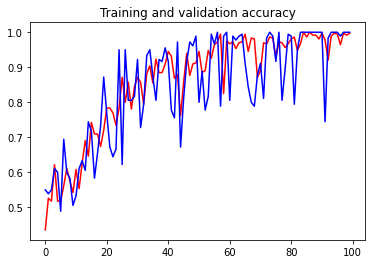

<Figure size 432x288 with 0 Axes>

In [14]:
## Now we can do a little plot to see the correlation between the training statistics and the validation statistics. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))



plt.plot(epochs, acc, 'r', label='Training accuracy')
plt. plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
classifier.save('/content/monomer-new-data/myBGiModel') 